In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_boston

#### Boston dataset 

1. Available as a standard dataset. 
2. This is small dataset of comprising of (506, 13)
3. The data itself is cryptic and hence would require some massaging -- panda library will come for rescue


In [90]:
boston = load_boston()
#print(boston)
#type(boston)
#boston.feature_names
#print(boston.data.shape)
print(boston.data)


[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


## Dataset details

1. There are 13 independant variable -- boston.feature_names
2. Price is the dependant variable that we need to predict
    a. It is stored in the `target` variable and hence we first need to incorporate it in bos data frame 
3. By default the dataFrames does not have columns and we need to explicitly tie the column names to the Data Frame

In [97]:
bos = pd.DataFrame(boston.data)
#print(bos.head)
#print(boston.feature_names)
bos.columns = boston.feature_names
#print(bos.head())
#print(boston.target)
#print(bos.describe())
bos['PRICE'] = boston.target
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## Anatomy of Machine learning Algorithm

An Michine learning Algo consists of 5 parts. 

1. Data -- We need to divide Data into sets of dependant and independant variables. 
2. Divide the data into training and testing set. 
3. Fit the training Dataset into model
4. Predict the Dependant variable in the testing dataset and check for correctness of the model
5. Adjust hyper parameters

In [101]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']




In [109]:
#Divide the data into training and test set... 
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
88,0.05660,0.0,3.41,0.0,0.4890,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50
365,4.55587,0.0,18.10,0.0,0.7180,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
242,0.10290,30.0,4.93,0.0,0.4280,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22
461,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
129,0.88125,0.0,21.89,0.0,0.6240,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34
12,0.09378,12.5,7.87,0.0,0.5240,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
419,11.81230,0.0,18.10,0.0,0.7180,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
79,0.08387,0.0,12.83,0.0,0.4370,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10


In [102]:
#Let's quickly look at our data set how it looks like
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [104]:
#Step 3 fit the model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
#Step 4
Y_test_pred = lm.predict(X_test)

In [107]:
#Step 5 Learn and improve
#Before we learn we need to check how we have fared.. 

df=pd.DataFrame(Y_test_pred,Y_test)
print(df)

               0
PRICE           
37.6   37.467236
27.9   31.391547
22.6   27.120196
13.8    6.468433
35.2   33.629667
10.4    5.670680
23.9   27.039467
29.0   29.927047
22.8   26.356613
23.2   22.452460
33.2   32.205044
19.0   21.786417
20.3   23.411384
36.1   33.608944
24.4   28.286195
17.2   15.138591
17.9    0.300873
19.6   18.718504
19.7   14.470671
15.0   11.108236
8.1     2.694942
23.0   19.216937
44.8   38.411593
23.1   24.369364
32.2   31.614934
10.8   11.422104
23.1   24.928622
21.2   23.311780
22.2   22.776408
24.1   20.650812
...          ...
10.5    5.626367
22.2   24.000463
30.5   30.371189
19.4   23.011267
15.6   18.291045
20.2   16.194709
19.3   21.608467
34.6   34.716659
50.0   23.405061
24.0   30.137479
18.7   18.095173
19.8   22.168443
22.5   29.092256
13.3   13.361467
50.0   31.860890
11.8   13.164368
11.0   13.917615
23.7   26.523144
35.4   31.394812
15.2   10.629138
24.4   24.686992
33.4   28.956509
31.6   32.317583
13.4   15.871136
34.9   29.943357
14.4    9.7183

## Testing manually for each and every variable is insane.... Can we do better 

# Statististics comes to our rescue 

   1. Lets revisit our class 10th/12th Physics and ## Acccuracy ## and ## Error
   

In [108]:
mse = mean_squared_error(Y_test, Y_test_pred)
print(mse)

28.5413672756


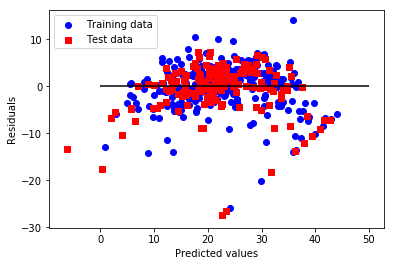

In [112]:
plt.scatter(Y_train_pred, Y_train_pred - Y_train,c='blue',marker='o',label='Training data')
plt.scatter(Y_test_pred, Y_test_pred - Y_test,c='red',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc= 'upper left')
plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()